Compare NCEP and TRMM using data calculated in comparison_ncep2.ipynb. 

In [1]:
import numpy as np
import netCDF4 as nc
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [11]:
trmm_array = np.load("trmm_array_121875.npy")
ncep_array = np.load("ncep_array_121875.npy")

In [12]:
# we confine to 50 north to 50 south
#ncep:
test_path_ncep = "D:/ic/urop/data/ncep2/raw_data/prate.sfc.gauss.1998.nc"
data_test_ncep = nc.Dataset(test_path_ncep)
lat_ncep = data_test_ncep["lat"][:]
#print(lat_ncep)
start_ncep = np.abs(lat_ncep - 50).argmin().item()
end_ncep = np.abs(lat_ncep + 50).argmin().item()
xarr_ncep = lat_ncep[start_ncep: end_ncep]
yarr_ncep = ncep_array[start_ncep: end_ncep]
#print(xarr_ncep)

#trmm:
test_path_trmm = "D:/ic/urop/data/raw data/trmm_extra/20161108.nc4"
data_test_trmm = nc.Dataset(test_path_trmm)
lat_trmm = data_test_trmm["lat"][:]
start_trmm = np.abs(lat_trmm - 50).argmin().item()
end_trmm = np.abs(lat_trmm + 50).argmin().item()
xarr_trmm = lat_trmm[start_trmm: end_trmm:-1]
yarr_trmm = trmm_array[start_trmm: end_trmm:-1]
#print(xarr_trmm)

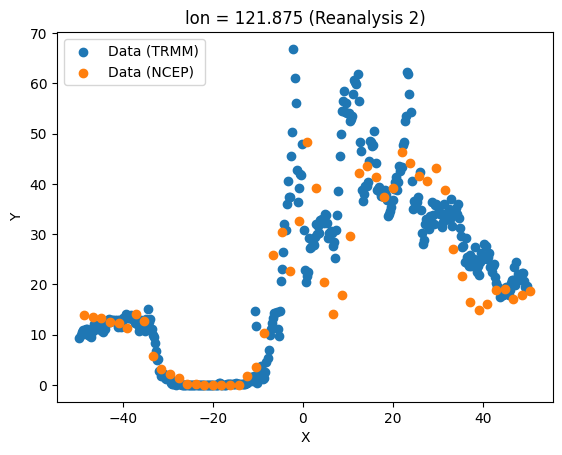

In [13]:
# plot curves
plt.scatter(xarr_trmm, yarr_trmm, label='Data (TRMM)')  # Plot original data points for TRMM
plt.scatter(xarr_ncep, yarr_ncep, label='Data (NCEP)')  # Plot original data points for NCEP
plt.xlabel('X')
plt.ylabel('Y')
plt.title("lon = 121.875 (Reanalysis 2)")
plt.legend()
plt.show()